In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from pandas.plotting import lag_plot
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose

In [7]:
df = pd.read_excel(r"C:\Users\user\Downloads\Airlines+Data (1).xlsx" , header =0,parse_dates=True)

In [8]:
df

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [10]:
df.isnull().sum()

Month         0
Passengers    0
dtype: int64

In [11]:
df.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


In [12]:
df.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [13]:
df.set_index('Month',inplace =True)

In [14]:
df

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-08-01,405
2002-09-01,355
2002-10-01,306


In [15]:
df.index.year

Int64Index([1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995,
            1995, 1996, 1996, 1996, 1996, 1996, 1996, 1996, 1996, 1996, 1996,
            1996, 1996, 1997, 1997, 1997, 1997, 1997, 1997, 1997, 1997, 1997,
            1997, 1997, 1997, 1998, 1998, 1998, 1998, 1998, 1998, 1998, 1998,
            1998, 1998, 1998, 1998, 1999, 1999, 1999, 1999, 1999, 1999, 1999,
            1999, 1999, 1999, 1999, 1999, 2000, 2000, 2000, 2000, 2000, 2000,
            2000, 2000, 2000, 2000, 2000, 2000, 2001, 2001, 2001, 2001, 2001,
            2001, 2001, 2001, 2001, 2001, 2001, 2001, 2002, 2002, 2002, 2002,
            2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002],
           dtype='int64', name='Month')

In [16]:
df.duplicated().any()

True

In [17]:
df = df.drop_duplicates()

In [19]:
df.duplicated().any()

False

In [20]:
DF = df.copy()

In [21]:
DF

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-07-01,413
2002-08-01,405
2002-09-01,355


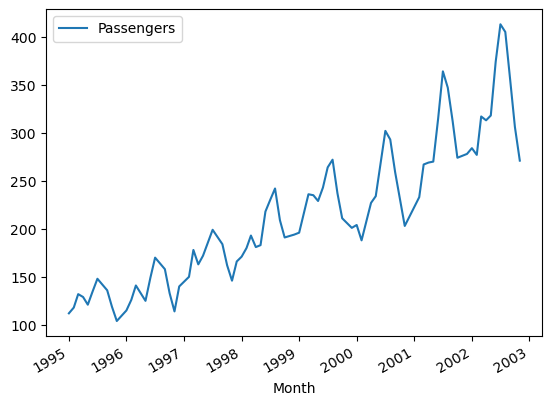

In [22]:
DF.plot()
plt.show()

In [23]:
## Histogram and density plots

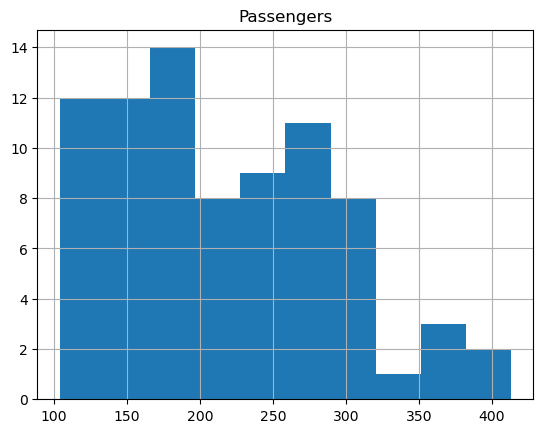

In [24]:
DF.hist()
plt.show()

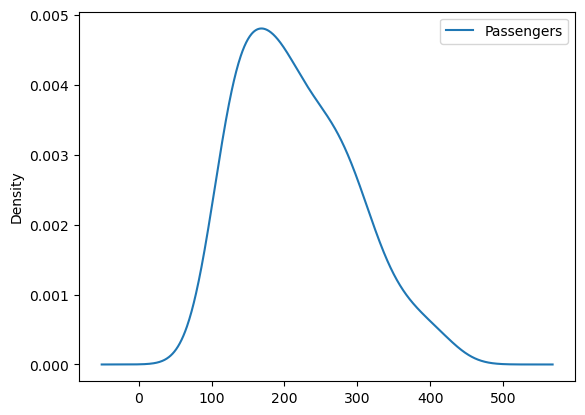

In [25]:
DF.plot(kind = 'kde')
plt.show()

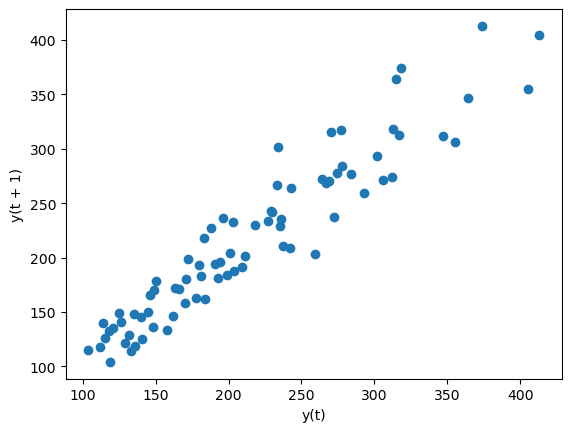

In [26]:
## Lag_plot
lag_plot(DF)
plt.show()

In [29]:
## UPsampling

In [30]:
upsampled = DF.resample('M').mean()

In [31]:
print(upsampled.head(32))

            Passengers
Month                 
1995-01-31       112.0
1995-02-28       118.0
1995-03-31       132.0
1995-04-30       129.0
1995-05-31       121.0
1995-06-30       135.0
1995-07-31       148.0
1995-08-31         NaN
1995-09-30       136.0
1995-10-31       119.0
1995-11-30       104.0
1995-12-31         NaN
1996-01-31       115.0
1996-02-29       126.0
1996-03-31       141.0
1996-04-30         NaN
1996-05-31       125.0
1996-06-30       149.0
1996-07-31       170.0
1996-08-31         NaN
1996-09-30       158.0
1996-10-31       133.0
1996-11-30       114.0
1996-12-31       140.0
1997-01-31       145.0
1997-02-28       150.0
1997-03-31       178.0
1997-04-30       163.0
1997-05-31       172.0
1997-06-30         NaN
1997-07-31       199.0
1997-08-31         NaN


            Passengers
Month                 
1995-01-31       112.0
1995-02-28       118.0
1995-03-31       132.0
1995-04-30       129.0
1995-05-31       121.0
1995-06-30       135.0
1995-07-31       148.0
1995-08-31       142.0
1995-09-30       136.0
1995-10-31       119.0
1995-11-30       104.0
1995-12-31       109.5
1996-01-31       115.0
1996-02-29       126.0
1996-03-31       141.0


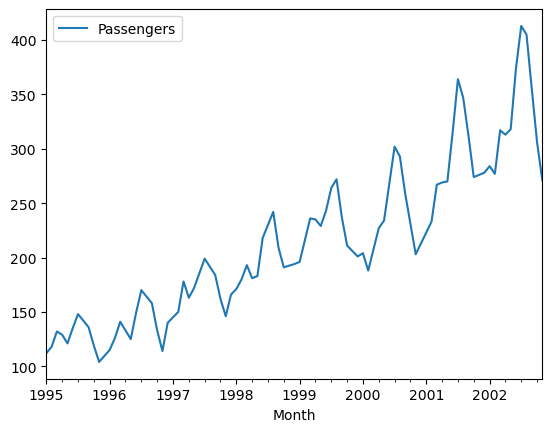

In [32]:
interpolated = upsampled.interpolate(method = 'linear') 
print(interpolated.head(15))
interpolated.plot()
plt.show()

In [33]:
interpolated

,Passengers
Month,
1995-01-31,112.0
1995-02-28,118.0
1995-03-31,132.0
1995-04-30,129.0
1995-05-31,121.0
...,...
2002-07-31,413.0
2002-08-31,405.0
2002-09-30,355.0


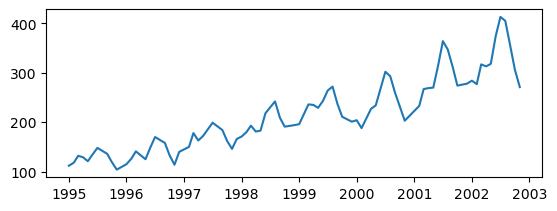

In [34]:
# line plot

plt.subplot(211)
plt.plot(DF)

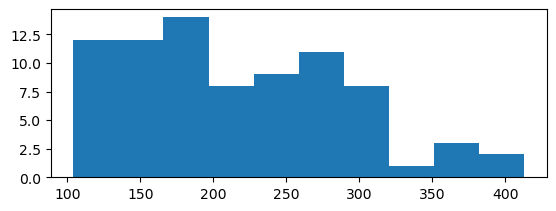

In [35]:
plt.subplot(212)
plt.hist(DF)
plt.show()

In [36]:
## Square Root Transform

In [39]:
dataframe = pd.DataFrame(DF.values)
dataframe.columns = ['Passengers']
dataframe['Passengers'] = np.sqrt(dataframe['Passengers'])

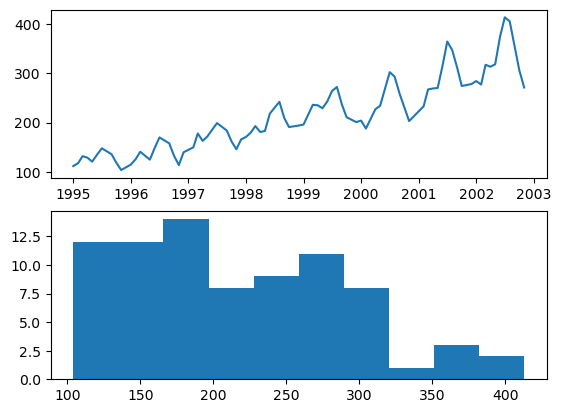

In [40]:
# line plot
plt.subplot(211)
plt.plot(df['Passengers'])
# Histogram
plt.subplot(212)
plt.hist(DF['Passengers'])
plt.show()

In [41]:
## Log Transform

In [42]:
from numpy import log

In [44]:
dataframe = pd.DataFrame(DF.values)
dataframe.columns = ['Passengers']
dataframe['Passengers'] = log(dataframe['Passengers'])

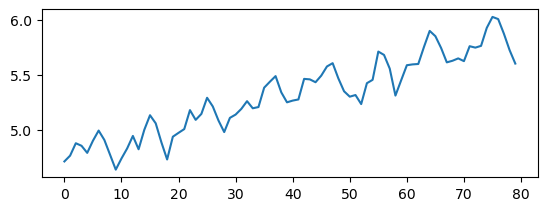

In [45]:
# line plot
plt.subplot(211)
plt.plot(dataframe['Passengers'])


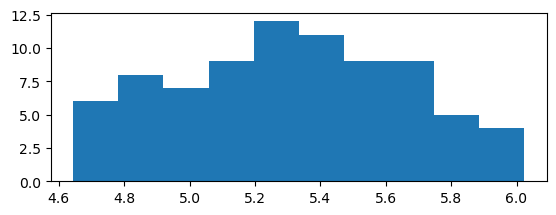

In [46]:
plt.subplot(211)
plt.hist(dataframe['Passengers'])
plt.show()

In [47]:
## Moving Average

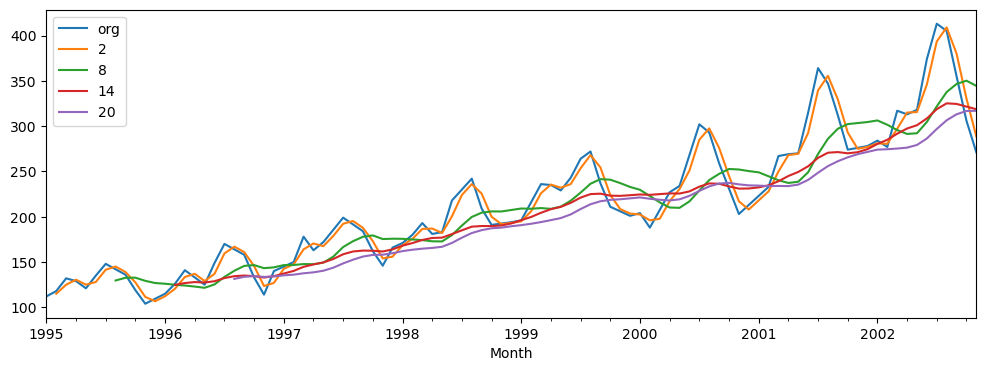

In [49]:
plt.figure(figsize=(12,4))

interpolated.Passengers.plot(label = "org")
for i in range (2 , 24 ,6):
    interpolated["Passengers"].rolling(i).mean().plot(label=str(i))
    plt.legend(loc='best')

In [50]:
## Time Series decomposition plot

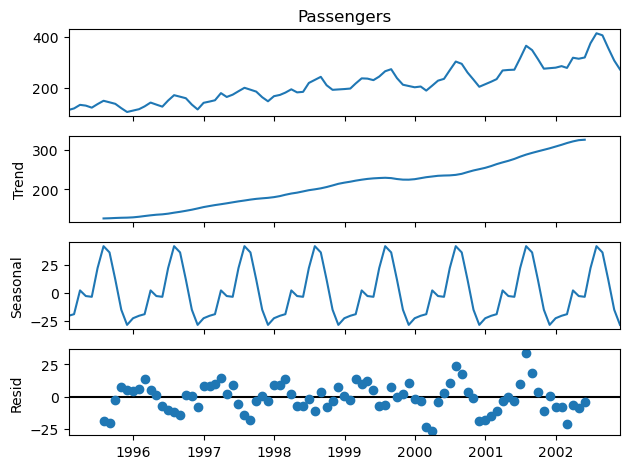

In [56]:
decompose_ts_add = seasonal_decompose(interpolated.Passengers)
decompose_ts_add.plot()
plt.show()

In [57]:
## ACF PLOT AND PACF PLOTS

In [58]:
 import statsmodels.graphics.tsaplots as tsa_plots

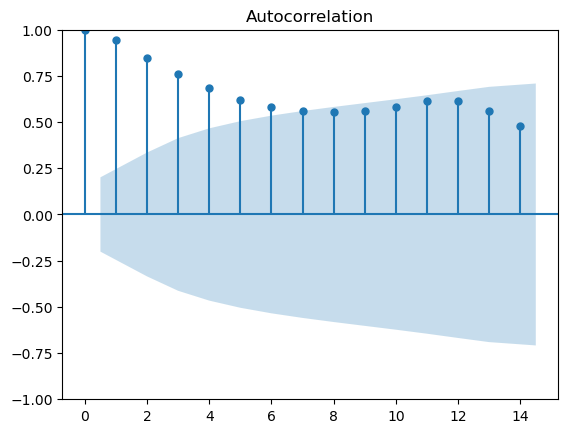

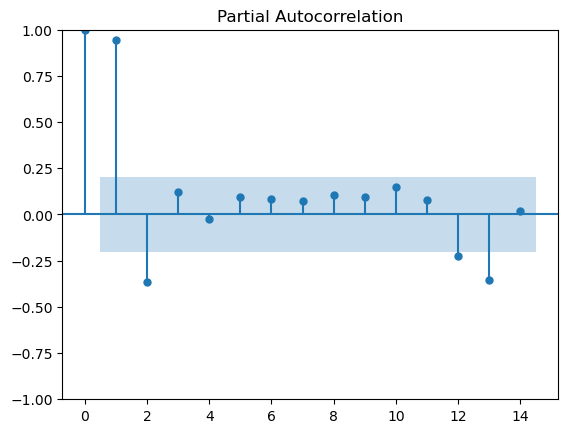

In [61]:
tsa_plots.plot_acf(interpolated.Passengers, lags = 14)
tsa_plots.plot_pacf(interpolated.Passengers, lags = 14)
plt.show()

In [67]:
hwe_model_add_add = ExponentialSmoothing(interpolated['Passengers'], seasonal = "add" , trend = "add" , seasonal_periods = 10).fit()

In [68]:
hwe_model_add_add.forecast(10)

2002-12-31    276.511327
2003-01-31    285.122477
2003-02-28    287.250094
2003-03-31    293.468880
2003-04-30    293.833963
2003-05-31    293.376093
2003-06-30    290.202000
2003-07-31    288.523790
2003-08-31    290.422429
2003-09-30    289.953802
Freq: M, dtype: float64

In [69]:
interpolated

,Passengers
Month,
1995-01-31,112.0
1995-02-28,118.0
1995-03-31,132.0
1995-04-30,129.0
1995-05-31,121.0
...,...
2002-07-31,413.0
2002-08-31,405.0
2002-09-30,355.0


In [70]:
interpolated.reset_index(inplace = True)

In [71]:
interpolated['t'] = 1

In [72]:
interpolated

,Month,Passengers,t
0,1995-01-31,112.0,1
1,1995-02-28,118.0,1
2,1995-03-31,132.0,1
3,1995-04-30,129.0,1
4,1995-05-31,121.0,1
...,...,...,...
90,2002-07-31,413.0,1
91,2002-08-31,405.0,1
92,2002-09-30,355.0,1
93,2002-10-31,306.0,1


In [74]:
for i , row  in interpolated.iterrows():
    interpolated['t'].iloc[i] = i+1

C:\Users\user\AppData\Local\Temp\ipykernel_23128\240847657.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interpolated['t'].iloc[i] = i+1


In [75]:
interpolated

,Month,Passengers,t
0,1995-01-31,112.0,1
1,1995-02-28,118.0,2
2,1995-03-31,132.0,3
3,1995-04-30,129.0,4
4,1995-05-31,121.0,5
...,...,...,...
90,2002-07-31,413.0,91
91,2002-08-31,405.0,92
92,2002-09-30,355.0,93
93,2002-10-31,306.0,94


In [76]:
interpolated['t_sq'] = (interpolated['t'])**2

In [77]:
interpolated

,Month,Passengers,t,t_sq
0,1995-01-31,112.0,1,1
1,1995-02-28,118.0,2,4
2,1995-03-31,132.0,3,9
3,1995-04-30,129.0,4,16
4,1995-05-31,121.0,5,25
...,...,...,...,...
90,2002-07-31,413.0,91,8281
91,2002-08-31,405.0,92,8464
92,2002-09-30,355.0,93,8649
93,2002-10-31,306.0,94,8836


In [78]:
interpolated["month"] = interpolated.Month.dt.strftime("%b")
interpolated["year"] = interpolated.Month.dt.strftime("%Y")

In [79]:
interpolated

,Month,Passengers,t,t_sq,month,year
0,1995-01-31,112.0,1,1,Jan,1995
1,1995-02-28,118.0,2,4,Feb,1995
2,1995-03-31,132.0,3,9,Mar,1995
3,1995-04-30,129.0,4,16,Apr,1995
4,1995-05-31,121.0,5,25,May,1995
...,...,...,...,...,...,...
90,2002-07-31,413.0,91,8281,Jul,2002
91,2002-08-31,405.0,92,8464,Aug,2002
92,2002-09-30,355.0,93,8649,Sep,2002
93,2002-10-31,306.0,94,8836,Oct,2002


In [80]:
months = pd.get_dummies(interpolated['month'])

In [81]:
months

,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
90,0,0,0,0,0,1,0,0,0,0,0,0
91,0,1,0,0,0,0,0,0,0,0,0,0
92,0,0,0,0,0,0,0,0,0,0,0,1
93,0,0,0,0,0,0,0,0,0,0,1,0


In [83]:
months = months[['Jan' , 'Feb' , 'Mar' , 'Apr' , 'May' , 'Jun' , 'Jul' , 'Aug' ,'Sep' ,'Oct' ,'Nov' , 'Dec']]

In [84]:
Airlines = pd.concat([interpolated,months] , axis = 1)

In [85]:
Airlines.head()

,Month,Passengers,t,t_sq,month,year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1995-01-31,112.0,1,1,Jan,1995,1,0,0,0,0,0,0,0,0,0,0,0
1,1995-02-28,118.0,2,4,Feb,1995,0,1,0,0,0,0,0,0,0,0,0,0
2,1995-03-31,132.0,3,9,Mar,1995,0,0,1,0,0,0,0,0,0,0,0,0
3,1995-04-30,129.0,4,16,Apr,1995,0,0,0,1,0,0,0,0,0,0,0,0
4,1995-05-31,121.0,5,25,May,1995,0,0,0,0,1,0,0,0,0,0,0,0


In [86]:
Airlines['log_passengers'] = np.log(Airlines['Passengers'])

In [87]:
Airlines

,Month,Passengers,t,t_sq,month,year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,log_passengers
0,1995-01-31,112.0,1,1,Jan,1995,1,0,0,0,0,0,0,0,0,0,0,0,4.718499
1,1995-02-28,118.0,2,4,Feb,1995,0,1,0,0,0,0,0,0,0,0,0,0,4.770685
2,1995-03-31,132.0,3,9,Mar,1995,0,0,1,0,0,0,0,0,0,0,0,0,4.882802
3,1995-04-30,129.0,4,16,Apr,1995,0,0,0,1,0,0,0,0,0,0,0,0,4.859812
4,1995-05-31,121.0,5,25,May,1995,0,0,0,0,1,0,0,0,0,0,0,0,4.795791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,2002-07-31,413.0,91,8281,Jul,2002,0,0,0,0,0,0,1,0,0,0,0,0,6.023448
91,2002-08-31,405.0,92,8464,Aug,2002,0,0,0,0,0,0,0,1,0,0,0,0,6.003887
92,2002-09-30,355.0,93,8649,Sep,2002,0,0,0,0,0,0,0,0,1,0,0,0,5.872118
93,2002-10-31,306.0,94,8836,Oct,2002,0,0,0,0,0,0,0,0,0,1,0,0,5.723585


<Axes: xlabel='year', ylabel='Passengers'>

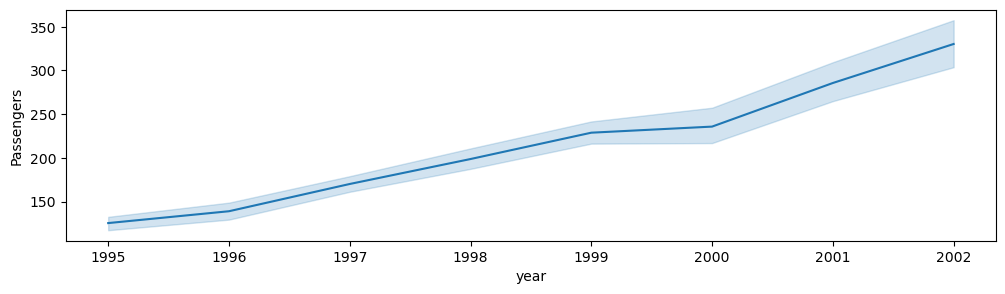

In [89]:
plt.figure(figsize = (12 , 3))
sn.lineplot(x = "year" , y = "Passengers" , data = Airlines)

In [90]:
## Spliting data
Train = Airlines.head(81)
Test = Airlines.tail(14)


In [91]:
## Linear Model


In [92]:
import statsmodels.formula.api as smf

In [93]:
linear_model = smf.ols("Passengers~t" , data = Train).fit()

In [94]:
pred_linear = pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))

In [95]:
rmse_linear = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_linear))**2))

In [96]:
rmse_linear

47.87107195088721

In [101]:
## Exponential

exp  = smf.ols("log_passengers~t" , data = Train).fit()

In [102]:
pred_exp = pd.Series(exp.predict(pd.DataFrame(Test['t'])))


In [103]:
rmse_exp = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_exp)))**2))

In [104]:
rmse_exp

42.37179623821815

In [105]:
## Quadratic

In [107]:
quad = smf.ols('Passengers~t+t_sq' , data = Train).fit()

In [108]:
pred_quad = pd.Series(quad.predict(Test[["t","t_sq"]]))

In [109]:
pred_quad

81    296.392874
82    299.431219
83    302.489786
84    305.568575
85    308.667586
86    311.786819
87    314.926274
88    318.085951
89    321.265850
90    324.465971
91    327.686314
92    330.926879
93    334.187667
94    337.468676
dtype: float64

In [110]:
rmse_quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_quad))**2))

In [111]:
rmse_quad

42.709870425152026

In [112]:
## Multiplicative additive seasonality

In [116]:
Mul_sea = smf.ols('log_passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov' , data = Train).fit()

In [118]:
pred_mul_sea = pd.Series(Mul_sea.predict(Test))

In [119]:
pred_mul_sea

81    5.604427
82    5.514719
83    5.584159
84    5.621308
85    5.662463
86    5.775167
87    5.755082
88    5.747496
89    5.873902
90    5.973121
91    5.956963
92    5.866333
93    5.738852
94    5.649145
dtype: float64

In [121]:
rmse_mul_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_mul_sea)))**2))

In [122]:
rmse_mul_sea

13.188070730263991

In [127]:
## RMSE_MULTIPLICATIVE ADDITIVE SEASONALITY suitable as compare to any aother above model